In [7]:
import sys
import gym
import numpy as np
from collections import defaultdict
environment = gym.make('Blackjack-v1')
print(environment.observation_space)
print(environment.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [12]:
environment.observation_space, environment.action_space

(Tuple(Discrete(32), Discrete(11), Discrete(2)), Discrete(2))

In [15]:
card_sum, dearler_card, is_ace =  (environment.observation_space)

In [17]:
card_sum, dearler_card, is_ace

(Discrete(32), Discrete(11), Discrete(2))

In [82]:
def generate_episode(environment: gym.Env):
    state = environment.reset()
    episode = []
    while True:
        #action = environment.action_space.sample()
        player_score, dealer_card, is_ace = state
        probs = [0.75, 0.25] if player_score > 18 else [0.25, 0.75]
        action = np.random.choice(np.arange(environment.action_space.n), p = probs)
        next_state, reward, is_done, _ = environment.step(action)
        episode.append((state,action,reward))
        if is_done:
            break
        state = next_state
    return episode



In [87]:
EPISODES_COUNT = 10
episodes = []
for i in range(EPISODES_COUNT):
    episode = generate_episode(environment)
    print("Episode: ", episode)
    episodes.append(episode)

Episode:  [((15, 8, False), 1, 0.0), ((18, 8, False), 0, 1.0)]
Episode:  [((18, 1, False), 1, -1.0)]
Episode:  [((11, 9, False), 1, 0.0), ((19, 9, False), 0, -1.0)]
Episode:  [((9, 10, False), 1, 0.0), ((16, 10, False), 0, -1.0)]
Episode:  [((18, 7, False), 1, 0.0), ((20, 7, False), 1, -1.0)]
Episode:  [((18, 7, False), 1, -1.0)]
Episode:  [((19, 10, False), 0, 1.0)]
Episode:  [((19, 5, False), 0, 1.0)]
Episode:  [((21, 1, True), 1, 0.0), ((14, 1, False), 1, -1.0)]
Episode:  [((13, 10, False), 0, -1.0)]


In [137]:
episode = generate_episode(environment)
print(episode)
states, actions, rewards = zip(*episode)
print(states)
print(actions)
print(rewards)

[((13, 2, False), 0, 1.0)]
((13, 2, False),)
(0,)
(1.0,)


In [200]:
GAMMA = 0.8
total_episodes = 100000
def monte_carlo_predictions(environment: gym.Env,total_episodes: int = 100):
    returns_sum = defaultdict(lambda: np.zeros(environment.action_space.n))
    N = defaultdict(lambda: np.zeros(environment.action_space.n))
    Q = defaultdict(lambda: np.zeros(environment.action_space.n))

    for episode_count in range(1, total_episodes+1):
        episode = generate_episode(environment)
        states, actions, rewards = zip(*episode)

        if episode_count % 10000 == 0: # monitor progress
            print(f"\rEpisode {episode_count}/{total_episodes}.episode = {episode}", end="")
            sys.stdout.flush()

        for i, state in enumerate(states):
            reward, action = rewards[i], actions[i]
            #print(i, state, reward, action)
            discounts = np.array([GAMMA**i for i in range( len(rewards)  + 1)])
            discounted_return = np.dot(rewards[i:], discounts[ : -(i+1)])
            #print(discounted_return, rewards[i:], discounts[: (i+1) ])

            N[state][action] += 1.0
            returns_sum[state][action] = discounted_return
            Q[state][action] = returns_sum[state][action]/N[state][action]
            #print("Action Value function: ", Q[state])
    return Q

Q = monte_carlo_predictions(environment,total_episodes)
for item in Q.items():
    print(item)


Episode 100000/100000.episode = [((10, 2, False), 0, 1.0)]((14, 7, False), 1, 0.0), ((18, 7, False), 1, -1.0)]((21, 8, True), array([ 0.0030581 , -0.00566372]))
((13, 10, False), array([-0.00114025, -0.00031201]))
((15, 10, False), array([-0.00114679, -0.00030177]))
((16, 4, False), array([-0.0042735 ,  0.00125196]))
((17, 5, False), array([ 0.0045045 , -0.00125392]))
((18, 5, False), array([ 0.00462963, -0.00148368]))
((16, 10, False), array([-0.00117786, -0.00036955]))
((19, 9, True), array([0.00917431, 0.        ]))
((19, 5, True), array([0.00877193, 0.01818182]))
((16, 8, False), array([-0.00478469,  0.00100156]))
((20, 4, False), array([ 0.00107759, -0.00254777]))
((13, 9, False), array([-0.0046729 , -0.00150602]))
((17, 9, False), array([ 0.00442478, -0.00148588]))
((18, 10, False), array([-0.00112486, -0.00036969]))
((21, 6, True), array([0.00306748, 0.00776699]))
((19, 10, False), array([-0.00039093, -0.00125313]))
((15, 1, False), array([-0.00473934, -0.00151976]))
((16, 1, Fa

In [205]:
State_Value_table={}
for state, actions in Q.items():
     #print( (state[0] > 18)* ( np.dot([0.75, 0.25], actions) ) )
     State_Value_table[state]= (state[0]>18)*(np.dot([0.75, 0.25],actions)) + (state[0]<=18)*(np.dot([0.75, 0.25],actions))
State_Value_table

{(21, 8, True): 0.000877648778111553,
 (13, 10, False): -0.000933191261515911,
 (15, 10, False): -0.000935534972089466,
 (16, 4, False): -0.002892139159744794,
 (17, 5, False): 0.003064898754553927,
 (18, 5, False): 0.0031013023409165843,
 (16, 10, False): -0.0009757795136576486,
 (19, 9, True): 0.006880733944954129,
 (19, 5, True): 0.0111244019138756,
 (16, 8, False): -0.0033381255101047535,
 (20, 4, False): 0.00017124698001317804,
 (13, 9, False): -0.0038811789212926467,
 (17, 9, False): 0.0029471130455364304,
 (18, 10, False): -0.0009360659862064377,
 (21, 6, True): 0.004242361069748049,
 (19, 10, False): -0.0006064810188097296,
 (15, 1, False): -0.0039344415793946905,
 (16, 1, False): -0.003885770458171871,
 (11, 10, False): 0.001942067388404403,
 (16, 6, False): -0.003939665109506765,
 (17, 6, False): -0.002862487163186464,
 (20, 6, False): 3.0457347530518262e-06,
 (18, 1, False): -0.003954502369668247,
 (12, 6, False): -0.0038805475822477373,
 (17, 9, True): -0.027498785425101216

In [208]:
#source: https://github.com/udacity/deep-reinforcement-learning/blob/master/monte-carlo/plot_utils.py

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

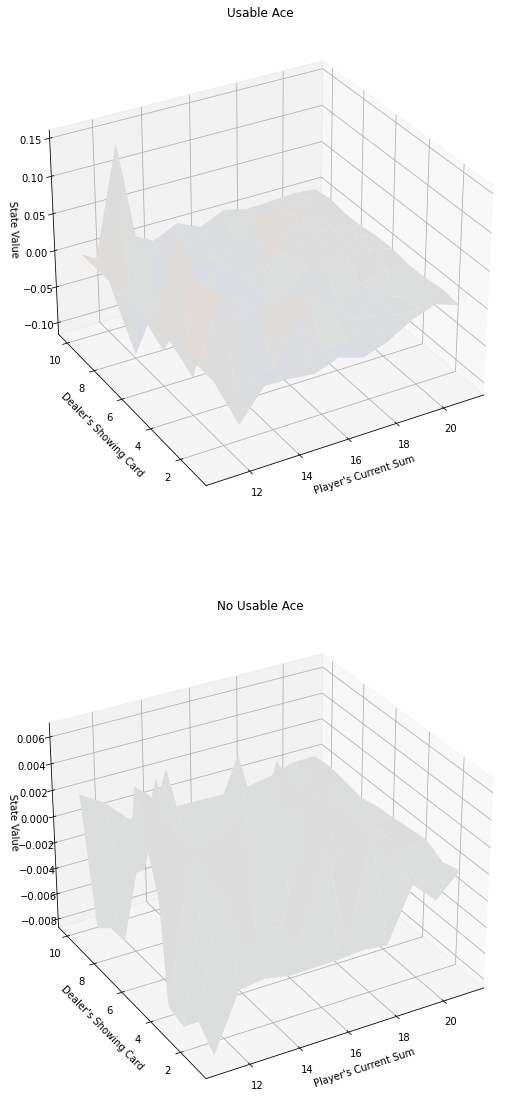

In [209]:
plot_blackjack_values(State_Value_table)